In [62]:
import os
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-paper')

In [41]:
data_dir = './hyperopt'

In [100]:
def load_rewards(dir_name, run='1'):
    results_dir = os.path.join(data_dir, dir_name)
    data = []
    for result_dir in os.listdir(results_dir):
        file = os.path.join(results_dir, result_dir, run, 'rewards.csv')
        if not os.path.exists(file):
            continue
        data.append((result_dir, pd.read_csv(file)))
    return data

def plot_rewards(data):
    plt.figure()
    for name, df in data:
        plt.plot(df[['train']], label=name)
    plt.legend()
    plt.title('train')
    plt.show()

    plt.figure()
    for name, df in data:
        plt.plot(df[['evaluation']], label=name)
    plt.legend()
    plt.title('evaluation')
    plt.show()  

In [101]:
def load_rewards_mean(dir_name):
    dfs = defaultdict(lambda: [])
    for run in range(3):
        run = str(run)
        data = load_rewards(dir_name, run=run)
        if data is not None:
            for name, df in data:
                dfs[name].append(df)
                
    means = {}
    for name, df_list in dfs.items():
        min_len = min(map(len, df_list))
        shortened_dfs = [df[:min_len] for df in df_list]
        df = None
        for other_df in shortened_dfs:
            if df is None:
                df = other_df
            else:
                df += other_df
        df /= len(df_list)
        means[name] = df
    
    return means

# Learning rates

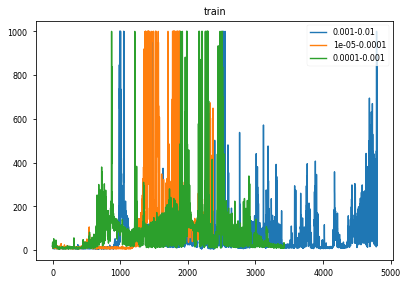

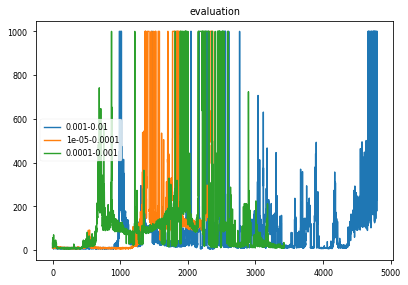

In [102]:
dir_name = 'learningrates'
lr_data = load_rewards(dir_name)
plot_rewards(lr_data)

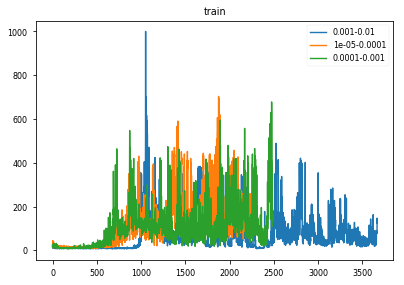

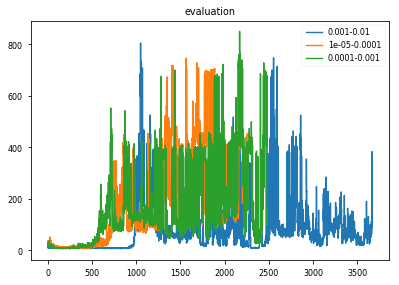

In [103]:
plot_rewards(load_rewards_mean(dir_name).items())

# Gammas

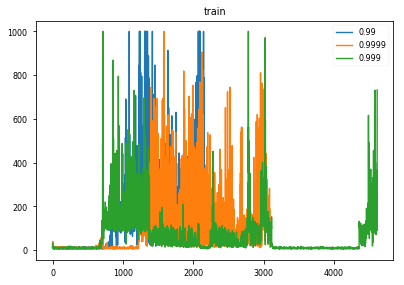

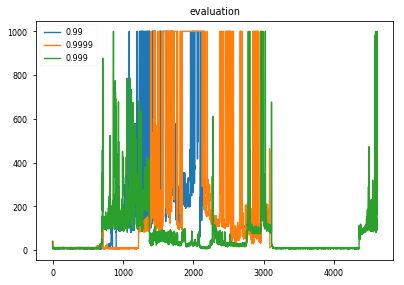

In [104]:
dir_name = 'gammas'
lr_data = load_rewards(dir_name)
plot_rewards(lr_data)

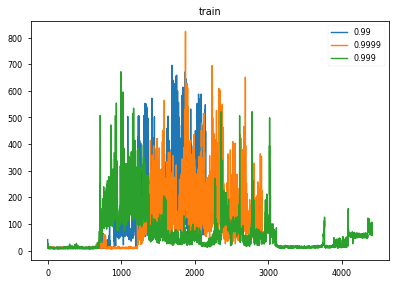

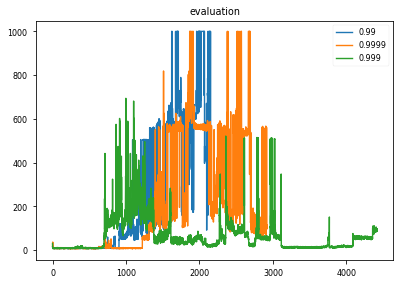

In [106]:
plot_rewards(load_rewards_mean(dir_name).items())

# Taus

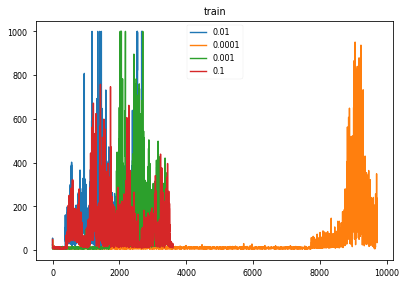

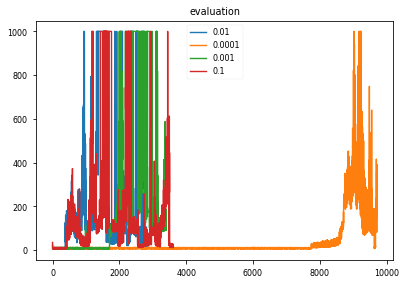

In [107]:
dir_name = 'taus'
lr_data = load_rewards(dir_name)
plot_rewards(lr_data)

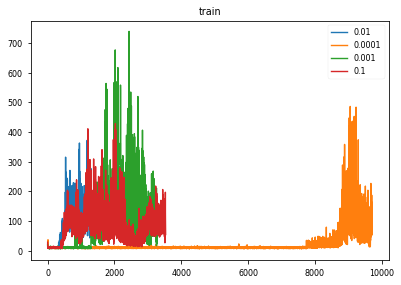

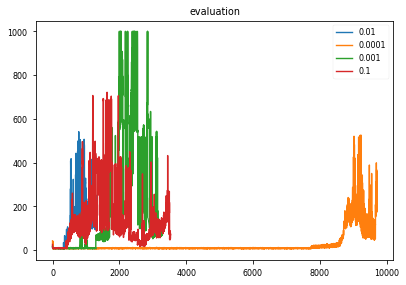

In [108]:
plot_rewards(load_rewards_mean(dir_name).items())

# Memory Size

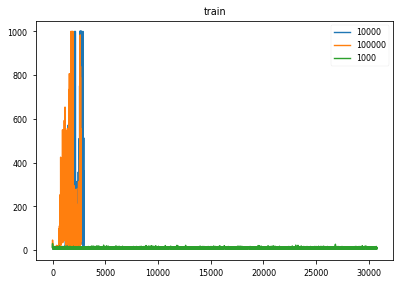

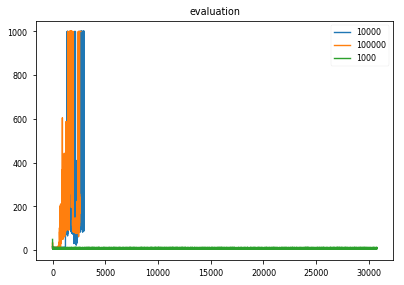

In [109]:
dir_name = 'replay_sizes'
lr_data = load_rewards(dir_name)
plot_rewards(lr_data)

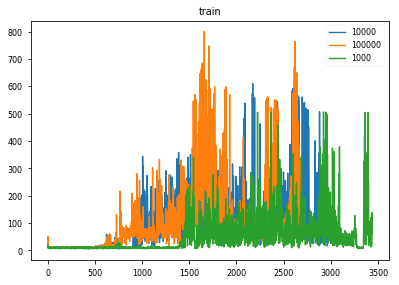

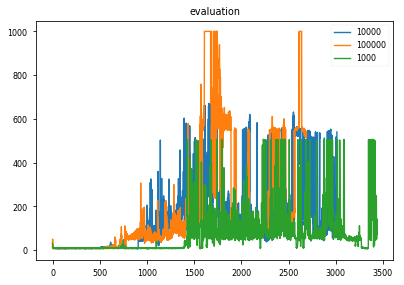

In [110]:
plot_rewards(load_rewards_mean(dir_name).items())